# This example illustrates how lammps creates and FCC lattice

First lets suppose we want to create a lattice with density $\rho = 0.8 $. An FCC lattice has 4 atoms in the unit cell. 3, due to 6 halves in the center of the faces and 4 quartes at the edges, totalling 4 atoms.

The particle number is density $rho = 0.8 = 4/V$ then V = 5, giving $a= v^{(1/3)} = 1.70996$.

In Lammps, the definition of the lattice is descibed in the documentation as: 

lattice style scale keyword values ...

where scale = scale factor between lattice and simulation box


and for LJ systems scale = reduced density rho* 

Therefore lets create a single 

In [9]:
import pandas as pd
import numpy as np
from lammps import IPyLammps
import matplotlib.pyplot as plt


L = IPyLammps() #Creates the object
L.units("lj")
L.atom_style("atomic")
#L.atom_modify("map array")

l_box = 1
L.lattice("fcc", 0.8)
L.region("box block", 0, l_box, 0, l_box, 0, l_box)
L.create_box(1, "box")
L.create_atoms(1, "box")
L.mass(1, 1.0)


n_atoms = L.system.natoms
v = L.eval ('vol')

print ("The density of the system is:%f"%(n_atoms/v))
print (" The lattice constant a =%f"%(v**(1./3)))

LAMMPS output is captured by PyLammps wrapper
The density of the system is:0.800000
 The lattice constant a =1.709976


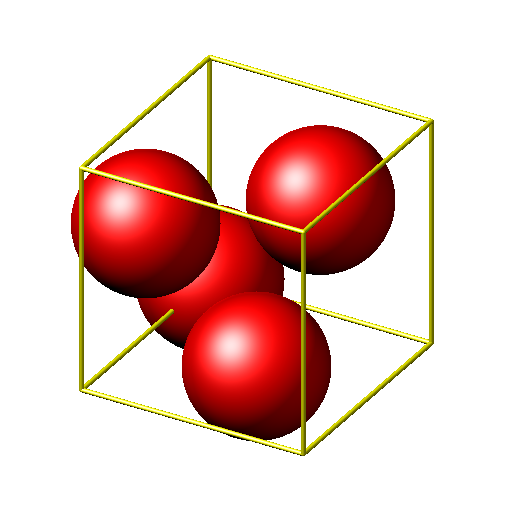

In [10]:
L.image()

In [11]:
L.close()

We see that in lattice, when we set the scale as the desired density and we let the box in lattice units, the unitary box has a side equal to the lattice constant. 

But what if we want to create a simulation box of a given size and we want the system to have approximately the density that we impose?


LAMMPS documentation says that "The scale argument determines how the size of the unit cell will be scaled when mapping it into the simulation box"

The answer is simple, we can define the box as we want, and then the density will be what we say in the scale if the simulation box is a multiple of the lattice constant $n*a$ or the box is too big, therefore will tend to the right density.

Below is an example where we know the lattice constant is $a = 1.7099$ (there is a first definition that is multimple of the lattice constant or a very large box

In [13]:
L = IPyLammps() #Creates the object
L.units("lj")
L.atom_style("atomic")
#L.atom_modify("map array")

l_box = 2*1.7099
l_box = 200
L.lattice("fcc", 0.8)
L.command("region box block  0 %f 0 %f 0 %f units box"%(l_box,l_box, l_box))
L.create_box(1, "box")
L.create_atoms(1, "box")
L.mass(1, 1.0)
L.image()

n_atoms = L.system.natoms
v = L.eval ('vol')

print ("The density of the system is:%f"%(n_atoms/v))

LAMMPS output is captured by PyLammps wrapper
The density of the system is:0.800806
